In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
import sklearn.model_selection
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score





In [2]:
df = pd.read_csv('breast_cancer_prediction.csv')

In [3]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

<AxesSubplot:>

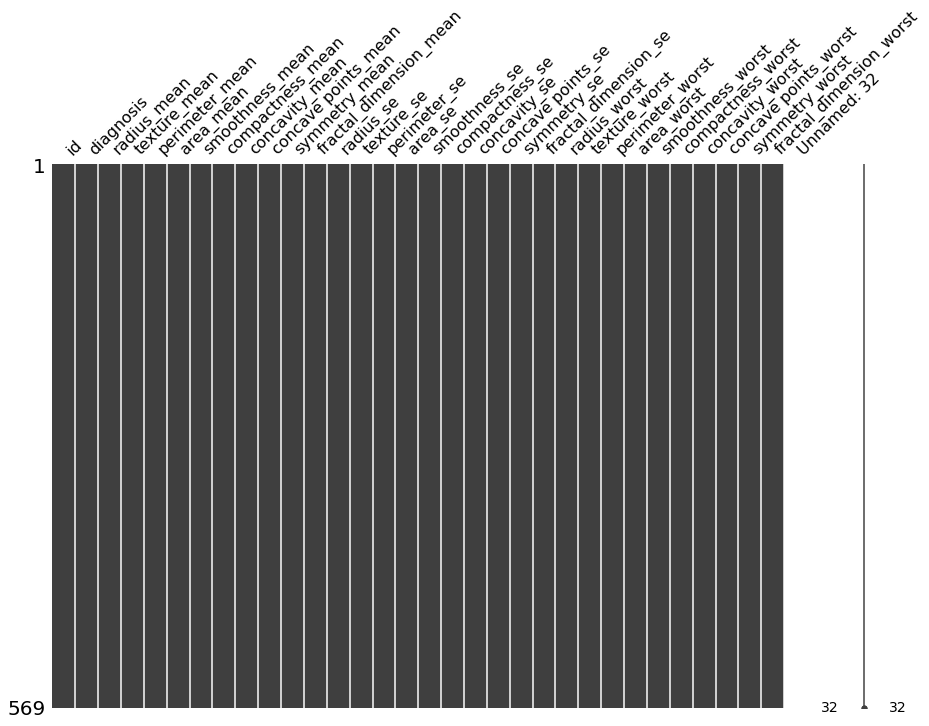

In [4]:
import missingno #visualize missing patterns in data

missingno.matrix(df, figsize = (15, 10))

In [5]:
del df['Unnamed: 32']
del df['id']

In [6]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

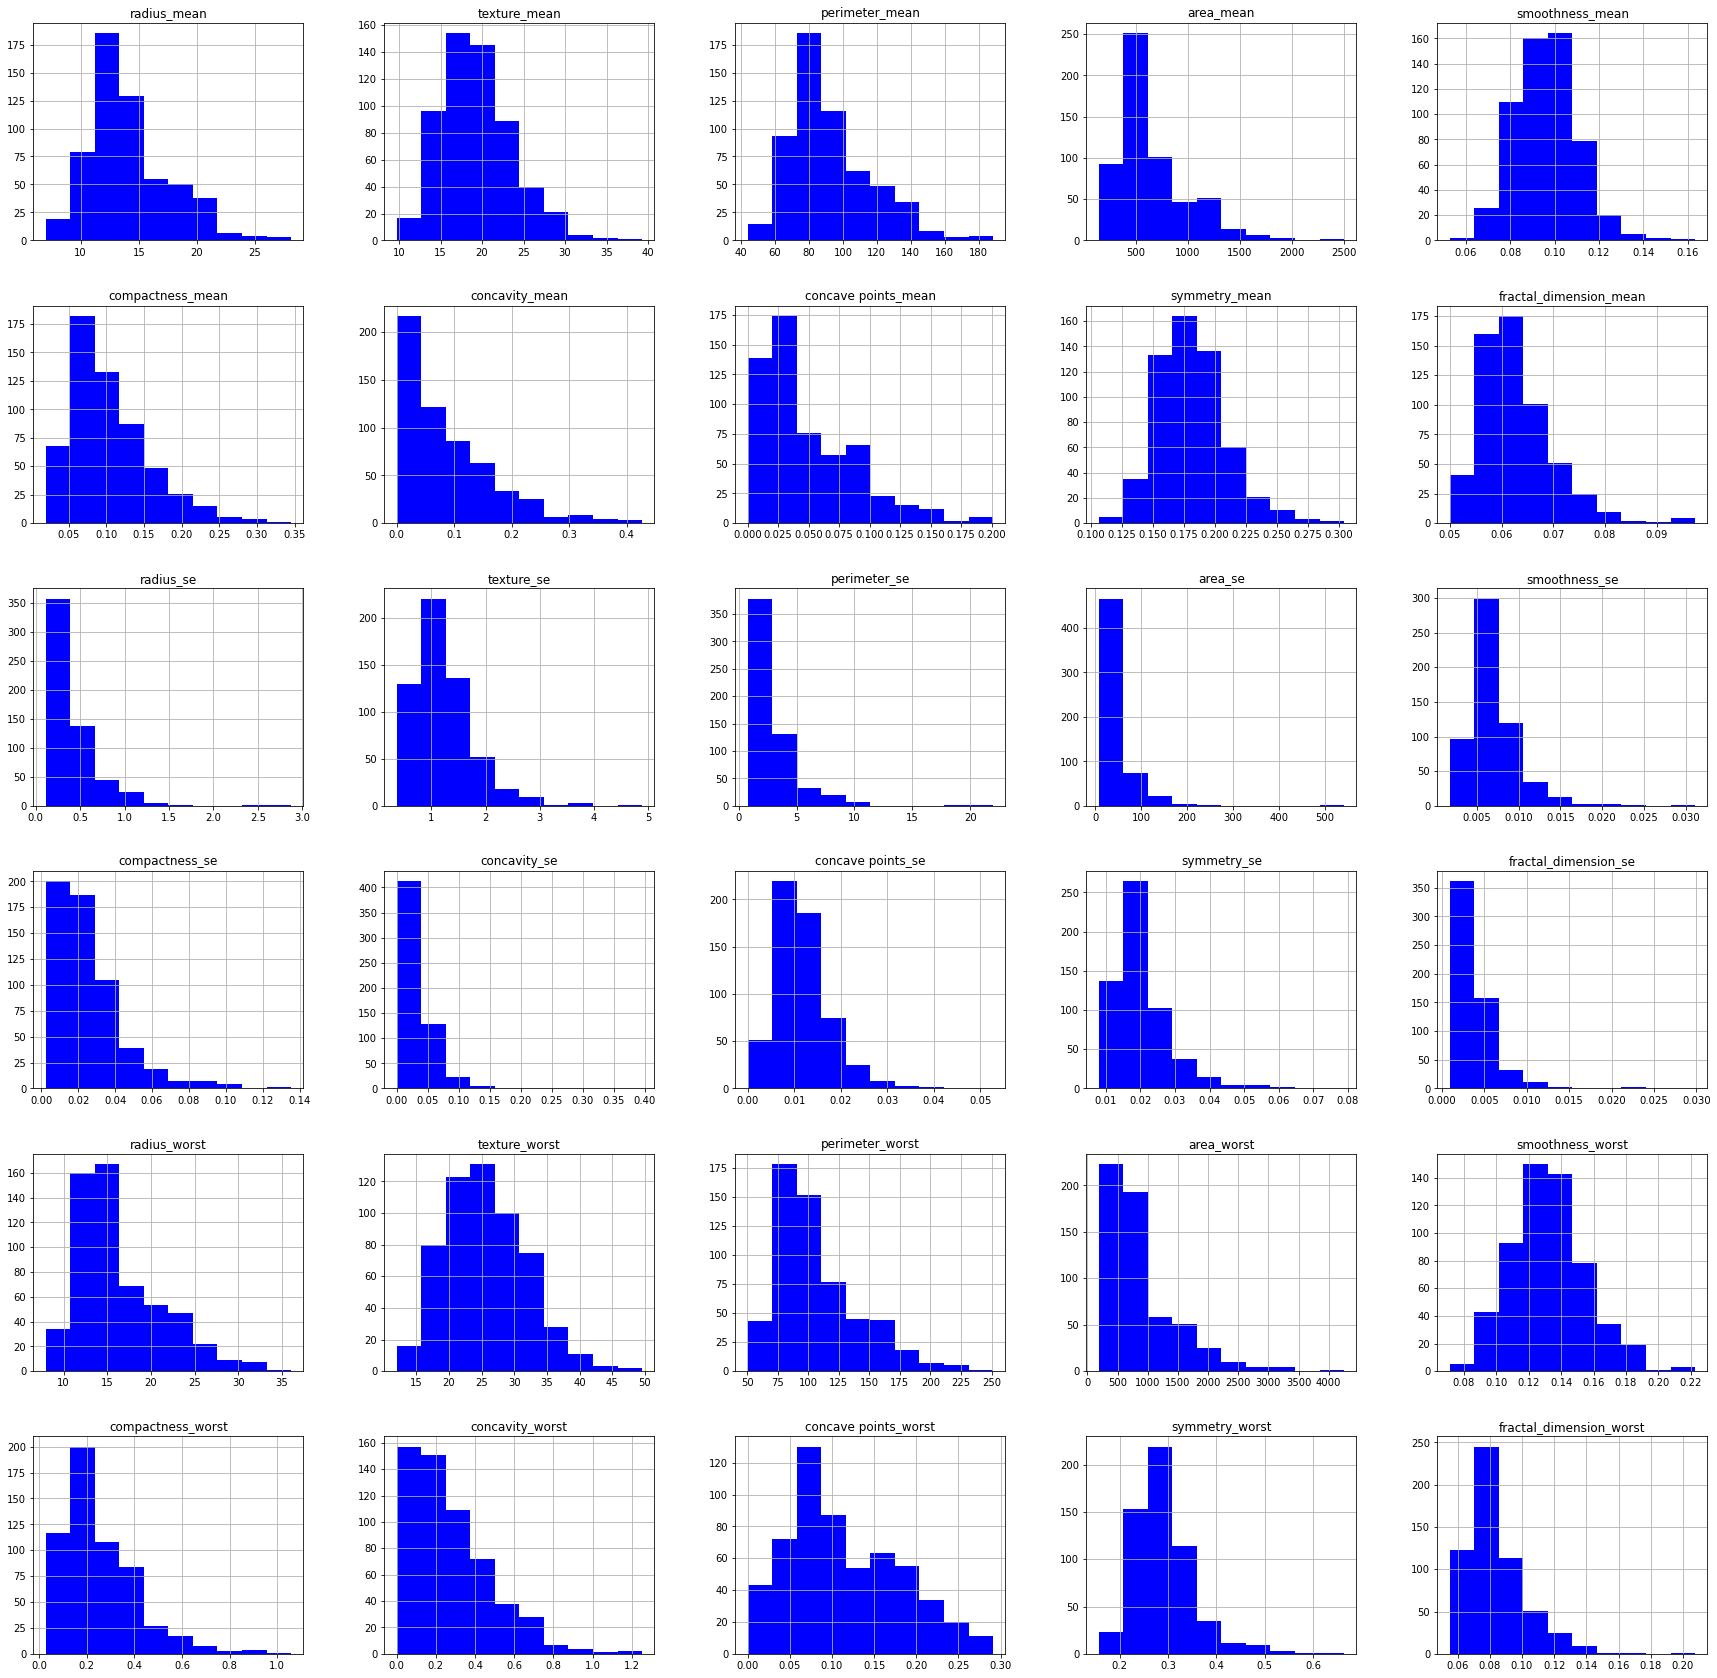

In [7]:
df.hist(figsize = (30,30), color = 'blue')
plt.show()


In [8]:
# Encode M and B to 1 and 0 in order to make more plots
change = df.columns.tolist()
datasetry = pd.get_dummies(df, columns=change)

datasetry.head()

datasetencoded = df.apply(LabelEncoder().fit_transform)

datasetencoded

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1          370             1             455        452   
1            1          426           186             486        513   
2            1          406           324             478        487   
3            1           98           297             164         95   
4            1          418            60             493        506   
..         ...          ...           ...             ...        ...   
564          1          438           370             503        522   
565          1          413           463             483        499   
566          1          340           458             410        421   
567          1          429           467             500        501   
568          0            3           414               1          3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0                444               531             521                  526   
1                120               215             321                  396   
2                403               459             478                  516   
3                471               533             507                  493   
4                332               414             480                  492   
..               ...               ...             ...                  ...   
564              410               364             509                  522   
565              295               312             415                  483   
566              115               308             329                  335   
567              442               530             530                  531   
568                0                37               0                    0   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0              416  ...           425             41              497   
1              219  ...           419            199              465   
2              348  ...           399            261              455   
3              426  ...           215            298              281   
4              216  ...           381             28              453   
..             ...  ...           ...            ...              ...   
564            173  ...           426            293              480   
565            187  ...           401            494              459   
566             94  ...           328            460              390   
567            413  ...           431            500              497   
568             91  ...             8            387                7   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0           516               358                516              520   
1           511               158                210              278   
2           491               287                464              438   
3           194               408                524              511   
4           470               239                245              415   
..          ...               ...                ...              ...   
564         518               263                255              423   
565         493               116                218              350   
566         413               106                371              366   
567         502               367                525              534   
568           7                10                 17                0   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                     483             485                      506  
1                     401             222                      375  
2                     468             445                      361  
3                     479             499                      533  
4                     363              81                      216  
..                    .

In [9]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

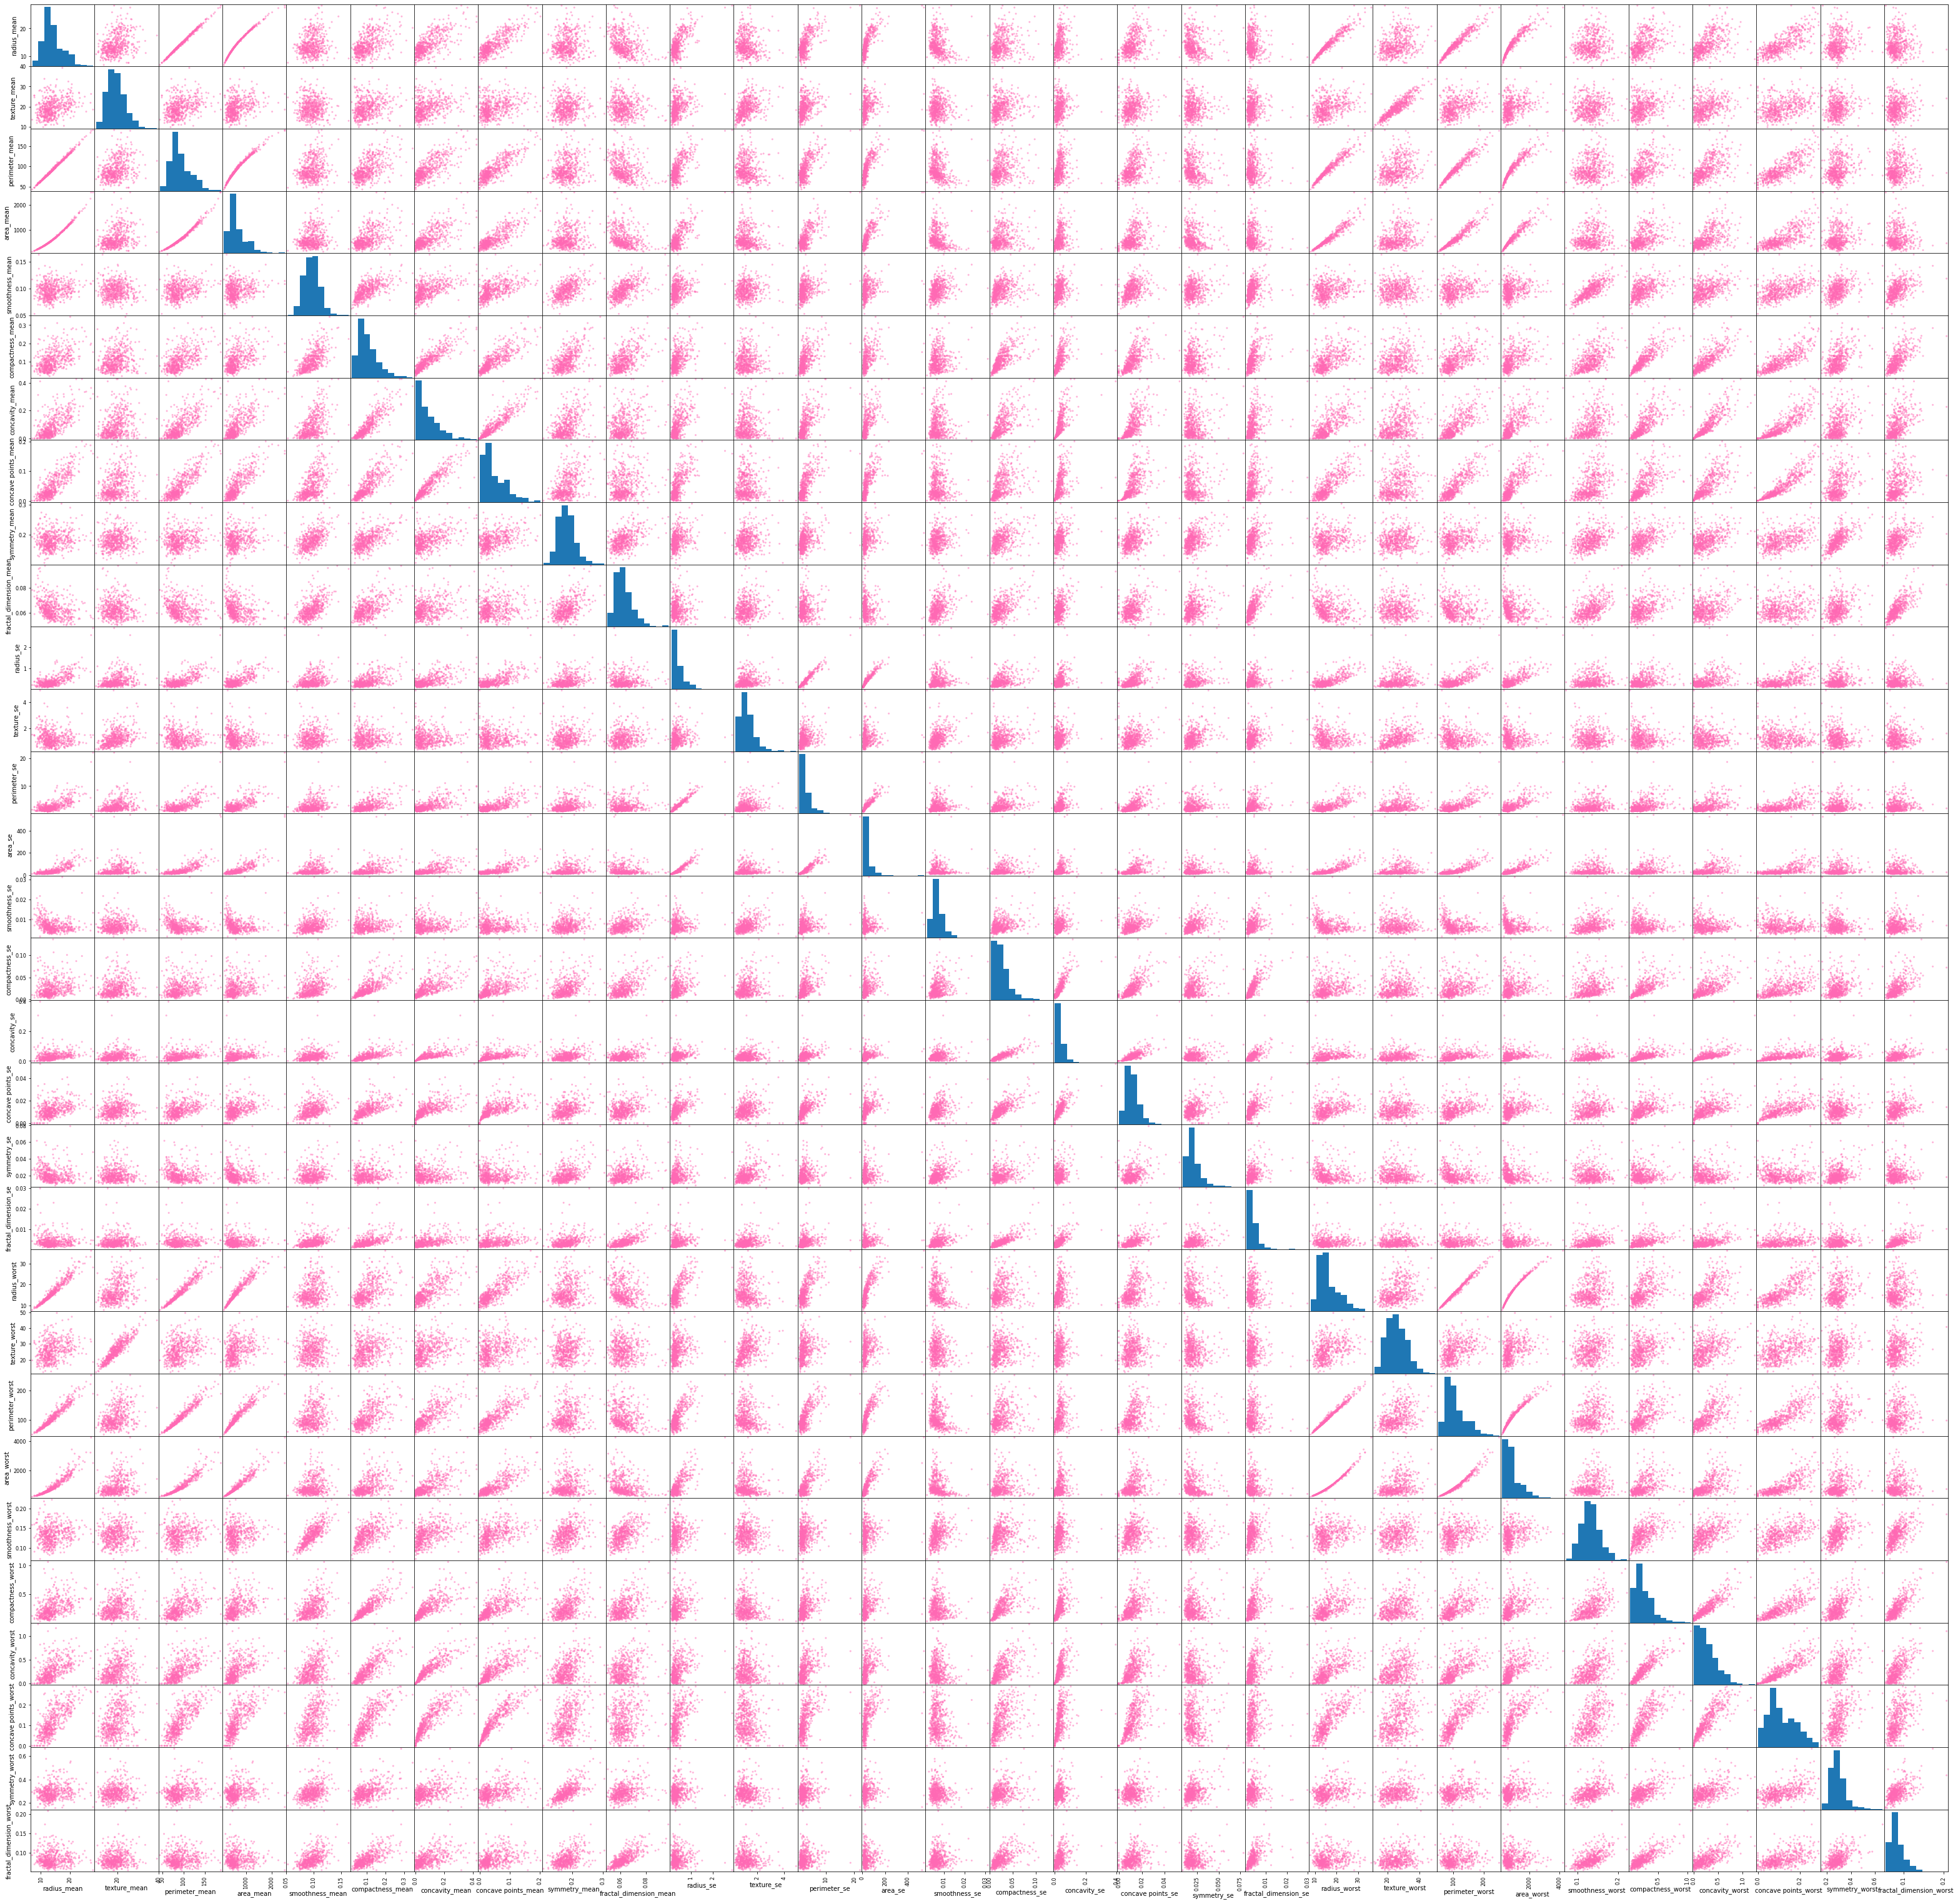

In [10]:
scatter_matrix(df, figsize = (55,55), color = 'hotpink')
plt.show()

In [11]:
datasetencoded.corr().round(decimals =2).style.background_gradient(cmap = 'YlOrRd')

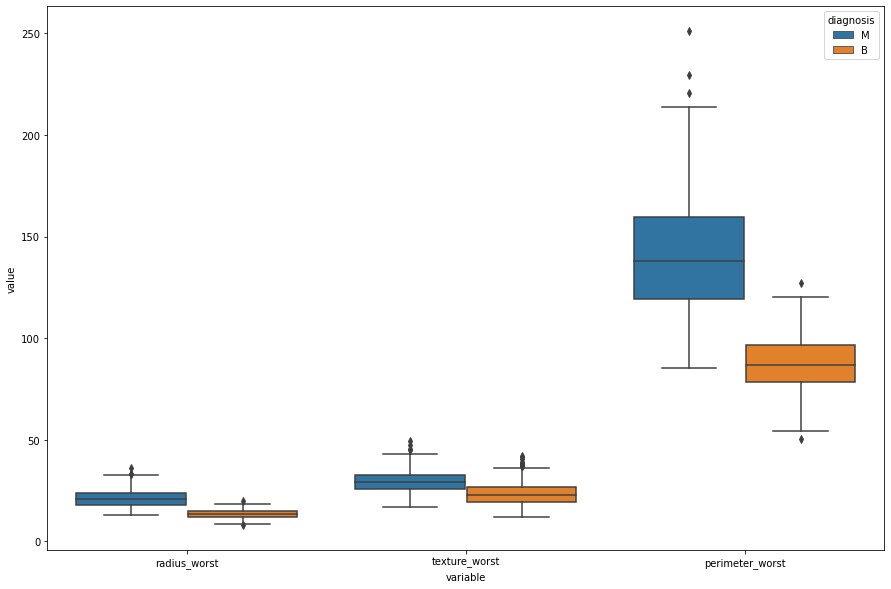

In [12]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
seaborn.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [13]:
X = np.array(df.drop(['diagnosis'],1))
y = np.array(df['diagnosis'])

# train_test_split split arrays or matrices into random train and test subsets
    
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [14]:
scoring = 'accuracy'
models = [] #create empty list for KNN model
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5))) 
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    
    # k fold training will will run 10 times, 
    
    kfold = model_selection.KFold(n_splits = 10, random_state = None)
    
   
    cv_results = model_selection.cross_val_score(model, X_train, y_train, 
                                                 cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.931643 (0.029011)
SVM: 0.909662 (0.047179)


In [15]:
for name, model in models: 
     
#prediction
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
# model has been trained, we're going to use it to make a prediction. 
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

#KNN stands for k-nearest neighbors algorithm. A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how 
#likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.
    


KNN
0.9298245614035088
              precision    recall  f1-score   support

           B       0.93      0.96      0.95        74
           M       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

SVM
0.9385964912280702
              precision    recall  f1-score   support

           B       0.91      1.00      0.95        74
           M       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114

